# Task 1, Anita Śledź

## Notes about my solution:

What is NOT working:
I didn't implement
- caching
- text generation

Everything else is implemented below, with few visualisations on the way.

# Task overview
In this homework assignment, you will implement a simple Transformer architecture using only basic layers such as nn.Embedding, nn.Linear, ReLU, softmax, and einsum. This will be a decoder-only model (language model), trained on a toy problem. You will analyze the results of the baseline Transformer and results with some minor changes to its components.

# Dataset
The dataset has already been generated for you. It is an artificial and simple dataset that was designed to make training quick and debugging easy. Each example in the dataset consists of a sequence of tokens, with each token represented by a number from 0 to 9. The length of each sequence is 64 tokens. Each and every sequence starts with token 0 (zero).

This is a language modeling task, which means that your model's task is to predict the next token in the sequence. Specifically, for each prefix of the input sequence, your model will generate a prediction for the token that should follow.

The dataset was generated in a particular way, but you don't need to know the details in order to complete the homework assignment. These details are provided in the code that generates the dataset. However, as an overview, we can see some patterns emerging in the following example sequences:

* [0, 1, 0, 1, 0, 1, 0, 1, 2, 3, 4, 2, 3, 4, 2, 3, 7, 8, 6, 7, 8, 6, 9, 4, ...]
  * In this example, 0 seems to always be followed by 1.
* [0, 4, 9, 7, 8, 9, 0, 4, 5, 2, 8, 5, 2, 8, 5, 2, 3, 4, 5, 2, 8, 9, 0, 4, ...]
  * Here, however, 0 is followed by 4.
* [0, 1, 2, 3, 4, 5, 3, 4, 7, 8, 0, 1, 2, 5, 3, 4, 7, 8, 0, 1, 6, 9, 2, 5, ...]
  * In every example we can see that the number N is often followed by N+1.


Each example is constructed with random patterns. In order to accurately predict the next token, your model will need to learn these patterns "on the fly" as it processes each example. This is called "in-context learning," where the model learns how to figure out the pattern instead of learning the pattern during training.

# Model implementation (60% points)
For this homework assignment, you will be implementing a version of the Transformer architecture with only the decoder, also known as a language model. Models from GPT family, like ChatGPT, are similar to what you will be implementing. In fact, ChatGPT even helped improve the readability and quality of writing in this homework assignment. A Transformer is helping to teach Transformers!

You can read the original paper introducing the Transformer for more details: https://arxiv.org/pdf/1706.03762.pdf.

Your model will consist of the following components:

* Learnable, randomly initialized embeddings (using nn.Embedding)
* Positional encoding
* A number of decoding blocks, each consisting of:
  * Multi-head attention (wrapped in a residual connection)
  * Feed-forward layer (wrapped in a residual connection)
* A linear layer to get the output probabilities

The general structure is already provided in the code. You will need to implement the following classes and functions:

* get_positional_encoding
* Attention
* FeedForward
* DecoderBlock

The DecoderModel has already been implemented, but you are welcome to change it if necessary for visualizations, etc. In general, you are free to change any part of the provided code if it makes it easier for you to implement something. 

# Model training (10% points)
The training loop has already been implemented, and it is up to you to decide on the model and learning parameters to use. The default values should be sufficient for achieving the expected accuracy.

Your model should be able to achieve 70% accuracy on the test set, with accuracy defined as the percentage of next tokens predicted correctly given the prefix. This is a token-level accuracy, not a sequence-level accuracy.

After training your model, you should briefly discuss the training and achieved accuracy compared to your expectations. Print and analyze probabilities given by your model - what thing the model learn? How efficient is it?

# Experiments (10% points)
To complete this part of the homework assignment, you will need to test additional models with a different number of DecoderBlocks. Specifically, you should test and report accuracy for 0, 1, 2, 3, maybe 4 DecoderBlocks.

After that, you should train models again with a variable number of blocks, but this time without positional encoding added to the embedding. You should observe that the model requires more layers to achieve the expected accuracy, but it is still able to do so.

# Text generation (20% points)

There are two methods for generating next token probabilities:
* The inefficient method involves running the model with each prefix, predicting the next token, adding it to the prefix, and then running the whole model again. Note that this method may result in a 10% reduction in points.
* The efficient method involves storing (caching) the K and V vectors used in the Attention layer, so that you can pass a single token to get the next one, instead of processing the whole prefix again.

Next, test and compare two sampling methods: argmax (taking, as the next token, the most likely token) and sampling from a distribution returned by the model. Generate a few sentences with those methods. How quickly a model can spot a pattern?

[Alternatively, you can also implement temperature sampling, which allows you to smoothly interpolate between argmax, sampling from a given distribution, and sampling from a uniform distribution.]

# Optional attention visualizations (0% points, but 100% cool)

To better understand how the Transformer model is making its predictions, you can visualize the attention weights in different layers. This will allow you to see which tokens the model is actually paying attention to when making its predictions.

It may be helpful to compare the attention weights in a 1-layer Transformer to those in a 2-layer Transformer to understand why a 1-layer Transformer may not be able to do in-context learning while a 2-layer Transformer can. You can also refer to the following resource for a more in-depth analysis: https://transformer-circuits.pub/2021/framework/index.html .

# Tips and tricks
* It is recommended that you read the original Transformer paper ("Attention is All You Need") at https://arxiv.org/pdf/1706.03762.pdf, as well as the illustrated blog post on the Transformer at http://jalammar.github.io/illustrated-transformer/ .
* All models should train very quickly, especially if you are using a GPU accelerator on colab.research.google.com . Your model should be able to reach 70% accuracy in less than 3 minutes.
* When implementing multi-head attention:
  * It can be helpful to use torch.einsum. You can find examples in the numpy documentation at https://numpy.org/doc/stable/reference/generated/numpy.einsum.html, specifically looking at "Tensor contraction." This can help reduce the number of reshapes, permutations, and transpositions needed for matrix multiplications and make it easier to compute the attention matrix.
  * Use the correct causal mask. Specifically, each "token" should only attend  to itself and previous tokens.
* You can also consider implementing separate (parameterless) functions for split_heads and merge_heads that take a tensor and number of heads as input.
* When implementing positional encoding, you can use "sin" on even dimensions and "cos" on odd dimensions, as described in the original paper. Alternatively, you can generate "sin" and "cos" separately and concatenate them. Both methods work equally well, and concatenation is generally easier to implement. You can refer to the "Illustrated Transformer" blog post for examples of both methods.
* If you are having trouble with any part of the implementation, it can be helpful to check the output of each module separately and the output predictions of your model to identify any issues.
* In the original Transformer paper, the LayerNorm layer is placed on the residual stream, after the Attention or FeedForward layer. However, it may be more effective to place the LayerNorm layer in front of the Attention or FeedForward layer, as this can help stabilize the training process and improve the model's performance. This approach has been used in some subsequent transformer-based models and has been found to be effective. It is possible that the placement of the LayerNorm layer in the original paper was simply a mistake and the code used actually placed the LayerNorm right before the FeedForward/Attention layers, where it should be.

# Simplifications
If you find certain parts of the task to be too difficult, you can try simplifying the task in one of the following ways. Keep in mind that your score may be reduced as a result, but this can help you proceed with the experiments and potentially identify any bugs in your code.

* If you are having trouble training the model, you can try generating a dataset with fewer tokens and a smaller sequence length. This may make it easier to identify and fix any issues with your code or to tune the hyperparameters of the model.
* If you are having difficulty implementing the positional encoding, you could try implementing learnable positional encoding. This involves adding an additional nn.Embedding layer that takes the position of the token (rather than the token itself) as input and returns an embedding for that particular position.
* If you are struggling to implement the multi-head attention, you might try implementing just a single head attention without any splitting and concatenation. This can help you understand the method and make it easier to implement multi-head attention later.
* When implementing Attention, it may be beneficial to skip the implementation of caching at first. You can train and evaluate the accuracy of the model without caching, and then add caching later to improve the efficiency of text generation (and your score).

## Picture below:
Below is a representation of the simplified model that you will be implementing. You may compare it with Figure 1 in the Attention is All You Need paper ( https://arxiv.org/pdf/1706.03762.pdf ).


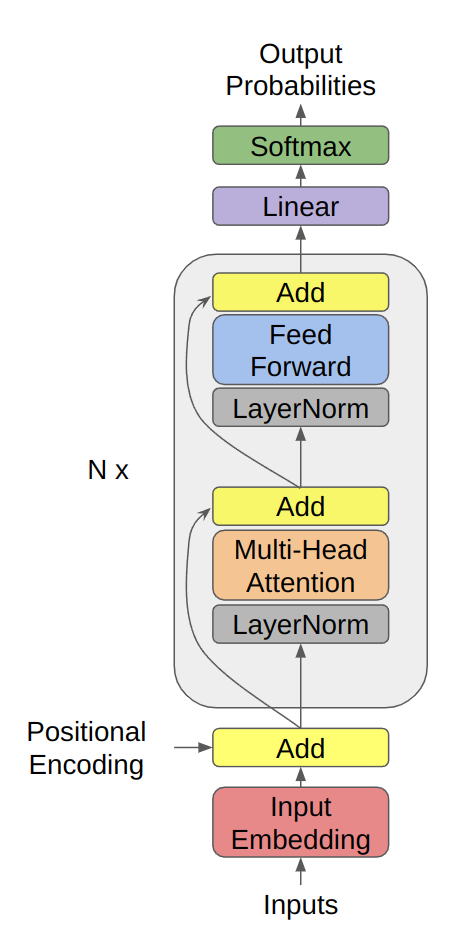

# Tools

In [129]:
# Basic imports
import matplotlib.pyplot as plt
import numpy as np
import torch

from collections import namedtuple

## Dataset generation
The tools below are responsible for generating the dataset. You should not modify them.

### Detailed dataset description
To generate each example, we first create a random Markov chain and sample a sequence of a given length starting at token zero. This Markov chain is specific to the current example.

To create the Markov chain, we follow this algorithm:
1. Generate a random permutation of the numbers P(x) - a bijection that maps each token in the vocabulary to another token.
2. Create a function INC(x) that maps the x-th token to the ((x+1)%N)-th token.
3. For each i-th token (node), create an outgoing edge to P(i) with probability 80% and to INC(i) with probability 20%.

This dataset design ensures that the sequences will be mostly predictable, but not completely. It also introduces learnable concepts that are both dataset-wide (due to the constant INC function) and sample-specific (due to the random P function).

In [130]:
# parameters for dataset generation. If you want to, you can change batch size, but there should be no reason to.
BATCH_SIZE = 128
SEQ_LEN = 64
VOCAB_SIZE = 10

In [131]:
import string

Edge = namedtuple("Edge", "to token prob")

In [132]:
def generate_random(size):
    """
    For generating a random sequence of elements.
    """
    prob = 1.0/size
    graph = {0: [Edge(to=0, token=a, prob=prob) for a in range(size)]}
    return graph

In [133]:
def generate_pseudo_permutation(size, true_prob=1.0):
    assert 0 < size
    assert 0 < true_prob <= 1.0
    permutation = np.random.permutation(size)
    graph = {}
    for v in range(size):
        e1 = Edge(to=(v+1) % size, token=v, prob=1. - true_prob)
        e2 = Edge(to=permutation[v], token=v, prob=true_prob)
        graph[v] = [e1, e2]
    return graph

In [134]:
class SeqGen:
    """
    For generating sequences based on a given Markov chain.
    Markov chain is represented as a directed graph with edges 
    labeled with probabilities and tokens to output
    (dictionary mapping vertex->Edge).
    Assumes that the starting vertex is 0.
    """
    def __init__(self, graph):
        self.graph = graph
        self.current = 0 # we will always start with 0

    def __iter__(self):
        return self

    def __next__(self):
        options = self.graph[self.current]
        probs = list(map(lambda x: x.prob, options))
        choice = np.random.choice(
            list(range(len(options))), size=1, p=probs)[0]
        self.current = options[choice].to
        return options[choice].token

In [135]:
def generate_dataset(gen_factory, seq_len, num_entries):
    """
    For generating datasets with num_entries elements each
    of length seq_len.

      gen_factory is a procedure that returns 
        instance of SeqGen when called.

      seq_len is the length of the sequence to generate.
      
      num_entries is the number of sequences to generate.
    """
    entries = []
    for e in range(num_entries):
        seq_gen = gen_factory()
        seq = []
        for s in range(seq_len + 1):
            seq.append(next(seq_gen))
        entries.append(seq)
    data = torch.tensor(entries, dtype=torch.long)
    x = data[:, :seq_len]
    y = data[:, 1:]       # we predict next token
    return torch.utils.data.TensorDataset(x, y)

In [136]:
def example_generator(gen):
    """
      gen is a procedure that returns a graph describing
      a Markov chain when called.
    """
    def example_gen():
        return SeqGen(gen())
    return example_gen

In [137]:
PERM_EXAMPLE_GENERATOR = example_generator(lambda: generate_pseudo_permutation(
            VOCAB_SIZE, true_prob=0.8))

RANDOM_EXAMPLE_GENERATOR = example_generator(lambda: generate_random(
            VOCAB_SIZE))


TRAIN_DATASET = generate_dataset(
    gen_factory=PERM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=10000)
TEST_DATASET = generate_dataset(
    gen_factory=PERM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=1000)

TRAIN_LOADER = torch.utils.data.DataLoader(
    TRAIN_DATASET, batch_size=BATCH_SIZE)
TEST_LOADER = torch.utils.data.DataLoader(TEST_DATASET, batch_size=BATCH_SIZE)

RANDOM_TRAIN_DATASET = generate_dataset(
    gen_factory=RANDOM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=100)

RANDOM_TEST_DATASET = generate_dataset(
    gen_factory=RANDOM_EXAMPLE_GENERATOR, seq_len=SEQ_LEN, num_entries=100)

RANDOM_TRAIN_LOADER = torch.utils.data.DataLoader(
    RANDOM_TRAIN_DATASET, batch_size=BATCH_SIZE)

RANDOM_TEST_LOADER = torch.utils.data.DataLoader(
    RANDOM_TEST_DATASET, batch_size=BATCH_SIZE)



## Data visualization

In [138]:
for index, x in enumerate(TRAIN_LOADER):
  print(x[0][0])
  if index >= 10:
    break

tensor([0, 6, 4, 2, 5, 7, 8, 1, 3, 0, 6, 4, 5, 7, 8, 1, 3, 0, 6, 4, 2, 5, 6, 4,
        2, 3, 0, 6, 4, 2, 5, 7, 8, 1, 3, 4, 2, 5, 7, 8, 1, 3, 0, 6, 4, 2, 3, 0,
        1, 2, 5, 7, 8, 1, 2, 5, 7, 8, 9, 9, 9, 9, 9, 9])
tensor([0, 9, 1, 0, 1, 0, 9, 1, 0, 1, 0, 9, 1, 0, 9, 0, 9, 1, 0, 9, 1, 0, 9, 1,
        0, 9, 1, 0, 9, 1, 0, 9, 0, 9, 1, 0, 9, 1, 0, 9, 0, 9, 1, 0, 9, 1, 0, 9,
        1, 0, 9, 1, 0, 1, 0, 9, 1, 0, 9, 1, 2, 3, 7, 5])
tensor([0, 3, 6, 1, 2, 3, 6, 1, 2, 3, 6, 7, 8, 2, 0, 1, 2, 0, 1, 8, 9, 0, 3, 4,
        5, 9, 4, 5, 9, 4, 7, 5, 9, 4, 5, 9, 0, 3, 6, 1, 8, 2, 0, 1, 8, 2, 0, 3,
        4, 7, 5, 9, 4, 5, 9, 4, 7, 5, 9, 4, 5, 9, 4, 7])
tensor([0, 2, 3, 4, 7, 8, 9, 8, 1, 2, 3, 4, 7, 5, 6, 0, 2, 3, 4, 7, 5, 6, 7, 8,
        1, 2, 3, 4, 7, 8, 1, 9, 0, 2, 3, 4, 7, 8, 1, 9, 8, 1, 9, 8, 1, 9, 0, 2,
        3, 4, 7, 5, 6, 0, 1, 9, 8, 9, 0, 2, 3, 4, 7, 5])
tensor([0, 1, 0, 9, 3, 5, 7, 2, 8, 9, 3, 5, 7, 8, 9, 0, 9, 3, 4, 5, 7, 2, 3, 5,
        7, 2, 3, 5, 7, 2, 8, 9, 0, 1, 0, 9, 3, 5, 7,

In [139]:
import networkx as nx

def plot_graph(graph):
    """
    Draws the graph that describes a Markov chain.
    """
    edg_list = []
    edg_labels = {}
    for v, out_edg in graph.items():
        for edg in out_edg:
            t = (v, edg.to)
            tr = (edg.to, v)
            text = f"{v}→{edg.to} = {edg.prob:.2f}"
            if t in edg_labels:
                edg_labels[t] += "\n" + text
            elif tr in edg_labels:
                edg_labels[tr] += "\n" + text
            else:
                edg_labels[t] = text
            edg_list.append(t)
    G = nx.DiGraph(directed=True)
    G.add_edges_from(edg_list)
    pos = nx.nx_pydot.graphviz_layout(G)
    fig = plt.figure(1, figsize=(300, 120), dpi=30)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edg_labels, font_size=120)
    nx.draw_networkx(G, pos, node_size=50000, arrows=True, arrowsize=200)
    nx.draw_networkx_labels(G, pos, font_size=120)

Below you can find some visualizations of the data.

In [140]:
# graph = generate_pseudo_permutation(10, true_prob=0.8)
# plot_graph(graph)
# data = [x for i, x in zip(range(SEQ_LEN), SeqGen(graph))]
# print(data)

# Main part

In [57]:
if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
    print("Ok we have cuda capable device")
else:
    DEVICE = torch.device("cpu")
    print("No cuda capable device. If you are running the code in Colab, you can enable a GPU by going to Runtime -> Change runtime type -> GPU.")
    print(" If you are running the code locally, you may need to install additional drivers and libraries, such as cuDNN, to enable GPU support.")


Ok we have cuda capable device


Before implementing the Transformer part of the model, you may (but don't have to) revisit the implementation of the softmax function. This can help you with the efficient implementation of the causal mask later on. 

In [58]:
def stable_softmax(x, dim):
    pass
    return None


# test_input = torch.arange(128, dtype=torch.float).reshape(2, 4, 16)
# assert torch.isclose(stable_softmax(test_input + 10.0**4, dim=-1),
#                      stable_softmax(test_input, dim=-1)).all()
# assert torch.isclose(stable_softmax(test_input, dim=-1),
#                      torch.nn.functional.softmax(test_input, dim=-1)).all()
# assert torch.isclose(stable_softmax(test_input, dim=-2),
#                      torch.nn.functional.softmax(test_input, dim=-2)).all()
# assert torch.isclose(stable_softmax(test_input, dim=0),
#                      torch.nn.functional.softmax(test_input, dim=0)).all()

## The architecture

Implement a module that performs Multi-Head Attention. For text generation, the module should be able to cache calculated keys and values. The cache should be indifferentiable (don't forget `.detach()`). Remember to use the causal mask to ensure that elements can only see themselves and elements that precede them.

In [59]:
import math

MHACache = namedtuple("MHACache", "k v")

### http://nlp.seas.harvard.edu/annotated-transformer/#encoder-and-decoder-stacks
def subsequent_mask(size):
    attn_shape = (1, size, size)
    subsequent_mask = torch.triu(torch.ones(attn_shape), diagonal=1).type(
        torch.uint8
    )
    return subsequent_mask == 1

class MultiHeadAttention(torch.nn.Module):
    def __init__(self, d_model, num_heads, d_head):
      super().__init__()
      self.d_model = d_model
      self.num_heads = num_heads
      self.d_head = d_head
      self.d_head_start = d_head

      self.wQ = torch.nn.ModuleList([torch.nn.Linear(d_model, d_head, bias=True).to(DEVICE) for _ in range(num_heads)])
      self.wK = torch.nn.ModuleList([torch.nn.Linear(d_model, d_head, bias=True).to(DEVICE) for _ in range(num_heads)])
      self.wV = torch.nn.ModuleList([torch.nn.Linear(d_model, d_head, bias=True).to(DEVICE) for _ in range(num_heads)])
      self.W0 = torch.nn.Linear(d_model, d_model, bias=True)

    def calculate_one_head(self, i, xi):
        q = self.wQ[i](xi) # 128, 64, 5 -> batch size ; length ; hidden_dim
        k = self.wK[i](xi)
        v = self.wV[i](xi)

        mask = subsequent_mask(xi.shape[1]).to(DEVICE)

        return self.attention(q, k, v, mask)

    ### http://nlp.seas.harvard.edu/annotated-transformer/#encoder-and-decoder-stacks
    def attention (self, q, key, value, mask):
      # batch size x length x hidden_dim
      k_transposed = key.permute(0, 2, 1) # batch size x hidden dim x len
      scores = torch.matmul(q, k_transposed) # batch size x length x length
      if mask is not None:
          scores = scores.masked_fill(mask, -1e9)
      att_weights = torch.nn.functional.softmax(scores / math.sqrt(self.d_head_start), dim = 2) # batch x length x length
      result = torch.matmul(att_weights, value) # batchsize x len x hiddendim
      return result, att_weights


    def get_empty_cache(self, batch_size):
        return MHACache(k=torch.empty(0, batch_size, self.num_heads, self.d_head, device=DEVICE),
                        v=torch.empty(0, batch_size, self.num_heads, self.d_head, device=DEVICE))

    def forward(self, x, cache):
      """
        x input of shape (seq, batch_size, d_model).

        cache is a MHACache object consisting of keys and values
          of shape (seq', batch_size, head, d_head)

      Returns the result of the attention computation along with the updated
      cache. The attention is calculated separately for each head. The attention
      mechanism used is decoder-style, which means that an element can only
      attend to itself and elements that precede it (including elements in the
      cache). The new cache is created by extending the old cache with the new
      keys and values computed for each head of x.
      """
      assert len(x.shape) == 3  # seq, batch, d_model
      assert x.shape[-1] == self.d_model

      assert len(cache.k.shape) == 4  # seq', batch, head, d_head
      assert cache.k.shape == cache.v.shape
      assert cache.k.shape[1] == x.shape[1]
      assert cache.k.shape[2] == self.num_heads
      assert cache.k.shape[3] == self.d_head


      ### New code
      x = x.permute(1, 0, 2)
      values = []
      for i in range(self.num_heads):
          single_head, _att_weight = self.calculate_one_head(i, x) # batchsize x hiddendim x len
          values.append(single_head)

      z_concat = torch.cat(values, dim=2)
      res = self.W0(z_concat)
      new_cache = None


      assert res.shape == x.shape
      return res, new_cache

Implement a FeedForward layer (pay attention to the place where the activation function is used).

In [60]:
class FeedForward(torch.nn.Module):
    def __init__(self, d_model, d_ff):
      super().__init__()
      # TODO
      self.d_model = d_model
      self.hidden_dim = d_model
      self.ff = torch.nn.Sequential(
          torch.nn.Linear(d_model, d_ff),
          torch.nn.ReLU(), # torch.relu
          torch.nn.Linear(d_ff, d_model),
      )

    def forward(self, x):
      assert len(x.shape) == 3  # seq, batch, d_model
      assert x.shape[-1] == self.d_model
      # TODO
      x = self.ff(x)

      assert len(x.shape) == 3  # seq, batch, d_model
      assert x.shape[-1] == self.d_model
      return x




Implement `DecoderLayer`: 
* use residual connections as in the image
* use `torch.nn.LayerNorm(d_model)`
* use `MultiHeadAttention` and `FeedForward` that you have implemented above

In [61]:
class DecoderLayer(torch.nn.Module):
    def __init__(self, d_model, d_ff, num_heads, d_head):
      super().__init__()
      self.d_model = d_model
      self.d_ff = d_ff
      self.num_heads = num_heads
      self.d_head = d_head

      self.attention = MultiHeadAttention(d_model, num_heads, d_head)
      self.layer_norm = torch.nn.LayerNorm(d_model)
      self.feed_forward = FeedForward(d_model, d_ff)
      # TODO

    def get_empty_cache(self, batch_size):
        return self.attention.get_empty_cache(batch_size)

    def forward(self, x, cache):
      x = self.layer_norm(x) # seq_len x batch_size x hidden_dim
      ax, _ = self.attention(x, cache) # batch_size x seq_len x hidden_dim
      ax = ax.permute(1, 0, 2) # seq_len x batch_size x hidden_dim
      x_ff = ax + x # seq_len x batch_size x hidden_dim
      fx = self.feed_forward(x_ff) # seq_len x batch_size x hidden_dim
      result = fx + x_ff # seq_len x batch_size x hidden_dim


      return result, cache

Implement positional encoding.

In [62]:
def get_positional_encoding(seqlen, hiddendim):
  """
  Returns a matrix P of shape (seqlen, hiddendim) where
  P[i] should be added to the ith element of the input sequence 
  as positional encoding.
  """

  pe = torch.zeros(seqlen, hiddendim)
  position = torch.arange(0, seqlen, dtype=torch.float).unsqueeze(-1)
  div_term = torch.exp(torch.arange(0, hiddendim, 2).float() * (-math.log(10000.0) / hiddendim))
  pe[:, 0::2] = torch.sin(position*div_term)
  pe[:, 1::2] = torch.cos(position*div_term)

  return pe.to(DEVICE)


Decoder is already implemented below.

In [63]:
class Decoder(torch.nn.Module):
    def __init__(self, vocab_size, d_model, d_ff, num_heads, d_head, num_layers, positional):
        super().__init__()
        self.vocab_size = vocab_size
        self.d_model = d_model
        self.embedding = torch.nn.Embedding(vocab_size, d_model)
        self.dec_layers = torch.nn.ModuleList([
            DecoderLayer(d_model=d_model, d_ff=d_ff, num_heads=num_heads, d_head=d_head) for i in range(num_layers)
        ])
        self.output_layer = torch.nn.Linear(
            d_model, vocab_size, bias=True)
        self.positional = positional

    def get_empty_cache(self, batch_size):
        return [
            l.get_empty_cache(batch_size) for l in self.dec_layers
        ]

    def forward(self, x, cache, offset=0):
        assert len(x.shape) == 2  # seq, batch
        assert (x < self.vocab_size).all()
        assert len(self.dec_layers) == len(cache)

        x = self.embedding(x)

        if self.positional:
          x = x + get_positional_encoding(x.shape[0]+offset, self.d_model)[offset:, None, :]

        new_cache = []
        for l, c in zip(self.dec_layers, cache):
            x, nc = l(x, c)
            new_cache.append(nc)

        x = self.output_layer(x)

        return torch.distributions.Categorical(logits=x), new_cache


## Training and evaluation

Eval is already implemented, please note that the model expects the input of shape `(seq_len, batch)`.

In [64]:
def take_most_probable(dist):
    return torch.argmax(dist.logits.detach(), dim=-1)

def take_sample(dist):
  return dist.sample()


def eval(model, test_loader):
    model.eval()
    ti = iter(test_loader)

    total = 0
    total_correct = 0
    for td in ti:
        x, y = td
        x = x.to(DEVICE).swapdims(0, 1)
        y = y.to(DEVICE).swapdims(0, 1)
        dist, cache = model(x, model.get_empty_cache(x.shape[1]))

        model_ans = take_most_probable(dist)
        assert model_ans.shape == y.shape
        total_correct += (model_ans == y).sum().cpu().item()
        total += np.prod(y.shape)

    return total_correct/total

In [65]:
def train(model, train_loader, test_loader, num_epoches):
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    losses = []
    accuracy = []
    for epoch in range(num_epoches):
        model.train()
        ti = iter(train_loader)
        epoch_total_loss = 0.0
        num_iters = 0
        for td in ti:
            x, y = td
            x = x.to(DEVICE).swapdims(0, 1)
            y = y.to(DEVICE).swapdims(0, 1)
            optimizer.zero_grad()
            dist, cache = model(x, model.get_empty_cache(x.shape[1]))

            loss = -dist.log_prob(y).mean()
            loss.backward()
            optimizer.step()

            num_iters += 1
            epoch_total_loss += loss.detach().cpu().item()

        acc = eval(model, test_loader)
        epoch_avg_loss = epoch_total_loss / num_iters
        losses.append(epoch_avg_loss)
        accuracy.append(acc)
        print(f"EPOCH {epoch} loss:{epoch_avg_loss} acc:{acc:.4f}")
    plt.plot(losses)
    plt.show()
    plt.plot(accuracy)
    plt.show()

Train the model on the dataset.

EPOCH 0 loss:2.176362188556526 acc:0.2976
EPOCH 1 loss:2.00094656099247 acc:0.3486
EPOCH 2 loss:1.6836404317541966 acc:0.6034
EPOCH 3 loss:0.9346834323074245 acc:0.7022
EPOCH 4 loss:0.7981522136096713 acc:0.7145
EPOCH 5 loss:0.7643484503408021 acc:0.7186
EPOCH 6 loss:0.7480544485623324 acc:0.7204
EPOCH 7 loss:0.736557904678055 acc:0.7214
EPOCH 8 loss:0.7283772056615805 acc:0.7219
EPOCH 9 loss:0.7230559029156649 acc:0.7216
EPOCH 10 loss:0.718815254259713 acc:0.7211
EPOCH 11 loss:0.7154244003416617 acc:0.7214
EPOCH 12 loss:0.7123476229136503 acc:0.7218
EPOCH 13 loss:0.7094637766669069 acc:0.7230
EPOCH 14 loss:0.7065985157519956 acc:0.7234
EPOCH 15 loss:0.7038779130464867 acc:0.7241
EPOCH 16 loss:0.7016090961951243 acc:0.7245
EPOCH 17 loss:0.6997204641752606 acc:0.7241
EPOCH 18 loss:0.6984290110914013 acc:0.7249
EPOCH 19 loss:0.6968713908255855 acc:0.7249
EPOCH 20 loss:0.6954517839830133 acc:0.7257
EPOCH 21 loss:0.6937545930282979 acc:0.7252
EPOCH 22 loss:0.6919186024726192 acc:0.7252
EPO

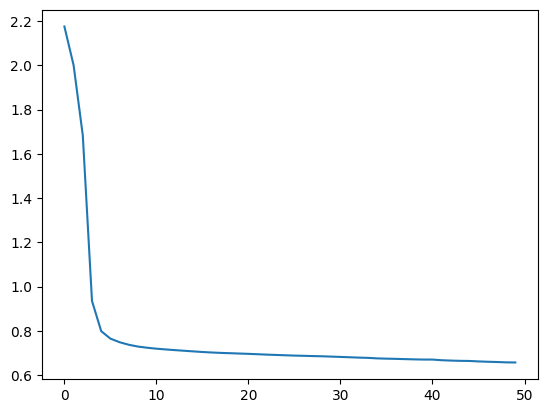

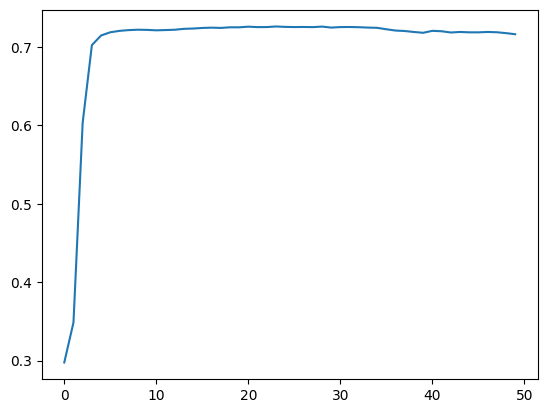

In [66]:
BATCH_SIZE = 128
# TODO zmienić to HIDDEN_DIM = 64
HIDDEN_DIM = 64
HIDDEN_FF = HIDDEN_DIM * 4
NUM_HEADS = 4
HEAD_DIM = HIDDEN_DIM // NUM_HEADS
NUM_LAYERS = 5
LR = 0.001
POSITIONAL = True

model = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS,
                positional=POSITIONAL)

model.to(DEVICE)
train(model, TRAIN_LOADER, TEST_LOADER, 50)

Make sure your model is not cheating (that is an element cannot attend to the next element). To do this check that accuracy on the random dataset is around 10% .

EPOCH 0 loss:2.4122655391693115 acc:0.1036
EPOCH 1 loss:2.4212799072265625 acc:0.0994
EPOCH 2 loss:2.354318618774414 acc:0.0964
EPOCH 3 loss:2.32124662399292 acc:0.0970
EPOCH 4 loss:2.3177828788757324 acc:0.0953
EPOCH 5 loss:2.3156449794769287 acc:0.1031
EPOCH 6 loss:2.3152246475219727 acc:0.1039
EPOCH 7 loss:2.3053505420684814 acc:0.1013
EPOCH 8 loss:2.295768976211548 acc:0.0963
EPOCH 9 loss:2.293780565261841 acc:0.1003
EPOCH 10 loss:2.2956089973449707 acc:0.0995
EPOCH 11 loss:2.296297550201416 acc:0.1028
EPOCH 12 loss:2.2946910858154297 acc:0.1037
EPOCH 13 loss:2.2911298274993896 acc:0.1023
EPOCH 14 loss:2.2868707180023193 acc:0.1034
EPOCH 15 loss:2.283623218536377 acc:0.0978
EPOCH 16 loss:2.2818760871887207 acc:0.0958
EPOCH 17 loss:2.28108549118042 acc:0.1005
EPOCH 18 loss:2.2807257175445557 acc:0.1011
EPOCH 19 loss:2.2801342010498047 acc:0.1003
EPOCH 20 loss:2.2782888412475586 acc:0.0959
EPOCH 21 loss:2.2751142978668213 acc:0.1006
EPOCH 22 loss:2.2718231678009033 acc:0.1042
EPOCH 2

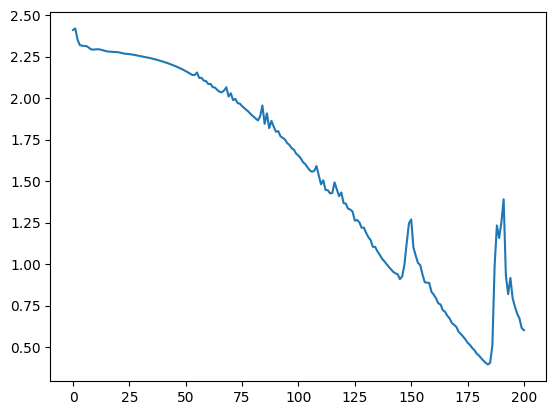

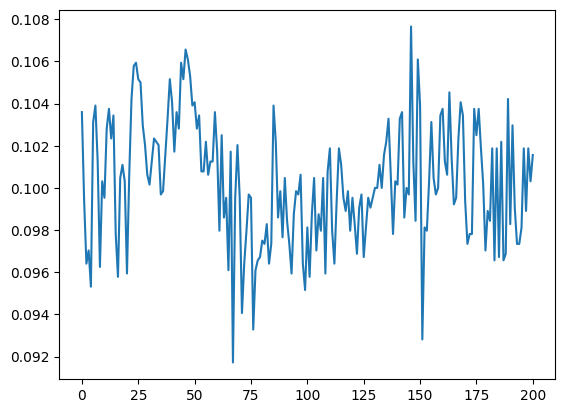

In [68]:
model_test = Decoder(vocab_size=VOCAB_SIZE, 
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS,
                positional=True)

model_test.to(DEVICE)
train(model_test, RANDOM_TRAIN_LOADER, RANDOM_TEST_LOADER, 201)

Choose a prefix of an arbitrary sequence from the test set (you can also write your sequence, just remember that every sequence starts with token 0). For each position in this sequence print the probability distribution over the next token according to the model. Analyze the results.

torch.Size([64, 1, 10])


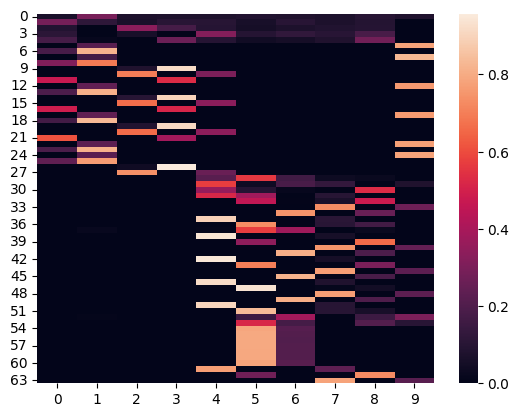

In [109]:
#TODO

import seaborn as sns

def get_heatmap(tensor):
    sns.heatmap((tensor.permute(1, 0, 2)[0]).to('cpu').detach())

prefix = [0, 9, 1, 3, 2, 0, 9, 0, 9, 1, 3, 2, 0, 9, 1, 3, 2, 0, 9, 1, 3, 2, 0, 9,
        0, 9, 1, 3, 4, 8, 7, 6, 4, 8, 7, 6, 4, 5, 6, 4, 8, 7, 6, 4, 8, 7, 6, 4,
        8, 7, 6, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 4, 8]

prefix = torch.tensor([prefix]).to(DEVICE)
prefix = prefix.transpose(1, 0)
dist, cache = model(prefix, model.get_empty_cache(prefix.shape[1]))

get_heatmap(dist.probs)

print(dist.probs.shape)

### Analyze

As we can see, at the beginning, the pattern is not very visible - but after few tokens, the pattern becomes clear - we have usually one or two possible characters with high probability, and a lot of others are just simply excluded. Nice!

One may want to know how many elements of a sequence a model needs to see in order to learn the underlying pattern.
To check this write a function that given a model and a data set loader calculates for each position in the range $[0,\text{SEQ_LEN}]$ average model accuracy. Assume that we take the most probable answer.

torch.Size([64, 128])


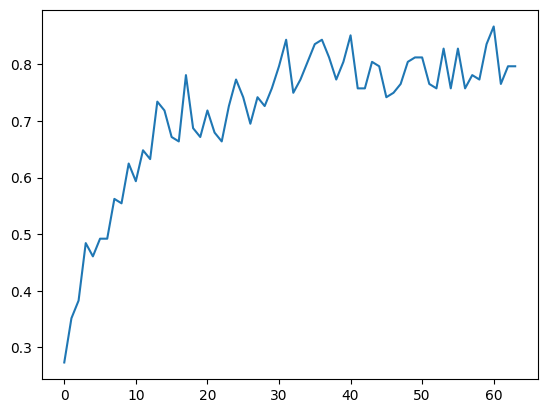

In [128]:
def eval_individual_tokens(model, test_loader):
    model.eval()
    x, y = tuple(map(lambda x: x.permute(1,0), next(iter(test_loader))))
    preds = take_most_probable(model.forward(x.to(DEVICE), model.get_empty_cache(x.shape[1]))[0])
    acc = ((preds.to(DEVICE) == y.detach().to(DEVICE)).type(torch.float32))
    print(acc.shape)
    seq_len_acc = acc.mean(dim=1).detach().cpu().numpy()
    plt.plot(np.arange(SEQ_LEN),seq_len_acc)
    plt.show()

eval_individual_tokens(model, TEST_LOADER)


# Additional experiments, text generation and visualizations

## Experiments considering number of layers and positional encodings
To complete this part of the homework assignment, you will need to test additional models with a different number of DecoderBlocks. Specifically, you should test and report accuracy for 0, 1, 2, 3, maybe 4 DecoderBlocks.

After that, you should train models again with a variable number of blocks, but this time without positional encoding added to the embedding. You should observe that the model requires more layers to achieve the expected accuracy, but it is still able to do so.

### Experiment 1.

Decoder blocks number: 0


 ----------- Model with layers: 0; positional = False -----------
EPOCH 0 loss:2.235626788078984 acc:0.2820
EPOCH 1 loss:2.176352884196028 acc:0.2820
EPOCH 2 loss:2.1760611081425147 acc:0.2820
EPOCH 3 loss:2.176115208034274 acc:0.2820
EPOCH 4 loss:2.1761521659319913 acc:0.2820
EPOCH 5 loss:2.176178238059901 acc:0.2820
EPOCH 6 loss:2.176197634467596 acc:0.2820
EPOCH 7 loss:2.1762125703352915 acc:0.2820
EPOCH 8 loss:2.176224331312542 acc:0.2820
EPOCH 9 loss:2.1762338107145287 acc:0.2820


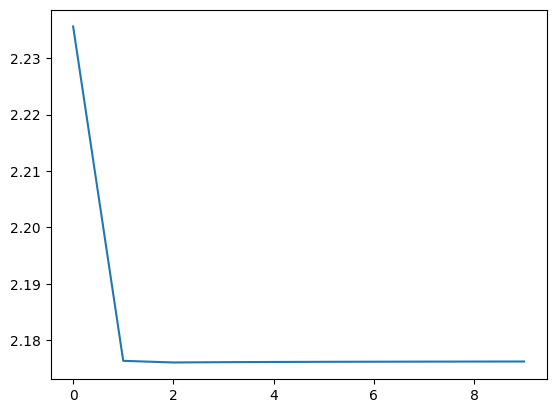

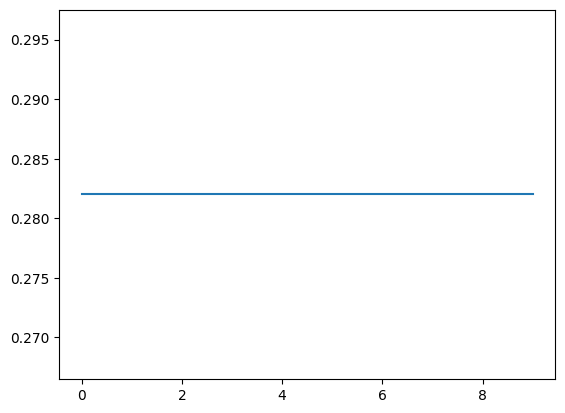

 ----------- Model with layers: 0; positional = True ----------- 
EPOCH 0 loss:2.2655402105065843 acc:0.2820
EPOCH 1 loss:2.1853935869434213 acc:0.2820
EPOCH 2 loss:2.179827997956095 acc:0.2820
EPOCH 3 loss:2.177733677852003 acc:0.2820
EPOCH 4 loss:2.1767130863817434 acc:0.2820
EPOCH 5 loss:2.1761616242082815 acc:0.2820
EPOCH 6 loss:2.1758419471451 acc:0.2820
EPOCH 7 loss:2.1756472617765015 acc:0.2820
EPOCH 8 loss:2.175524569764922 acc:0.2820
EPOCH 9 loss:2.1754453484016127 acc:0.2820


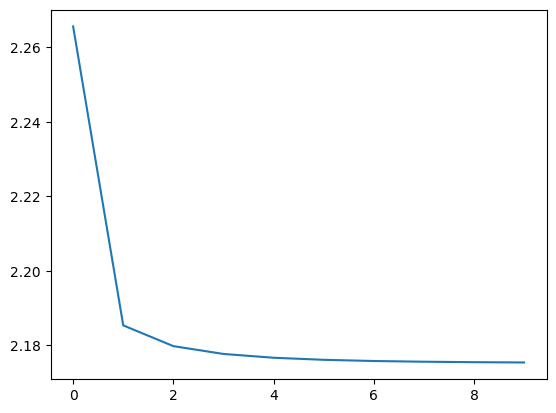

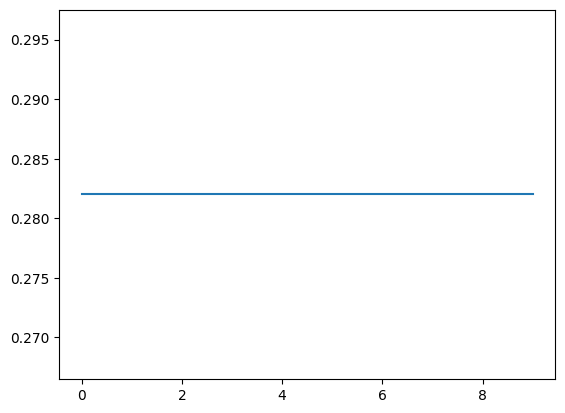

In [82]:
BATCH_SIZE = 128
HIDDEN_DIM = 64
HIDDEN_FF = HIDDEN_DIM * 4
NUM_HEADS = 4
HEAD_DIM = HIDDEN_DIM // NUM_HEADS
NUM_LAYERS = 0
LR = 0.001
POSITIONAL = True

print(" ----------- Model with layers: 0; positional = False -----------")
model_ex_1a = Decoder(vocab_size=VOCAB_SIZE,
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS,
                positional=False)

model_ex_1a.to(DEVICE)
train(model_ex_1a, TRAIN_LOADER, TEST_LOADER, 10)


print(" ----------- Model with layers: 0; positional = True ----------- ")
model_ex_1b = Decoder(vocab_size=VOCAB_SIZE,
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS,
                positional=True)

model_ex_1b.to(DEVICE)
train(model_ex_1b, TRAIN_LOADER, TEST_LOADER, 10)

### Experiment 2.

Decoder blocks number: 1

 ----------- Model with layers: 1; positional = False ----------- 
EPOCH 0 loss:2.1782889305790767 acc:0.2855
EPOCH 1 loss:2.1444405513473703 acc:0.2880
EPOCH 2 loss:2.135491992853865 acc:0.2900
EPOCH 3 loss:2.1296624322480793 acc:0.2914
EPOCH 4 loss:2.124850215791147 acc:0.2931
EPOCH 5 loss:2.1203932430170758 acc:0.2942
EPOCH 6 loss:2.1155809571471393 acc:0.2953
EPOCH 7 loss:2.1097505937648724 acc:0.2960
EPOCH 8 loss:2.1023473498187486 acc:0.2961
EPOCH 9 loss:2.0919515030293523 acc:0.2966


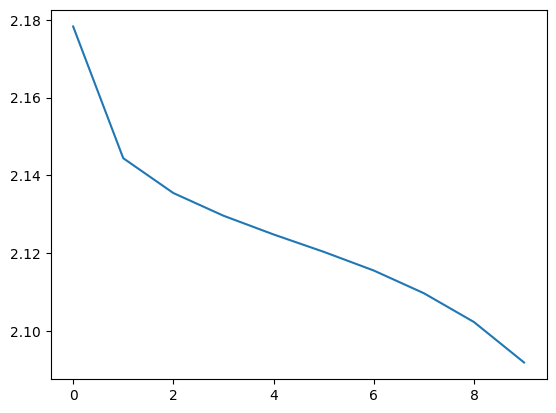

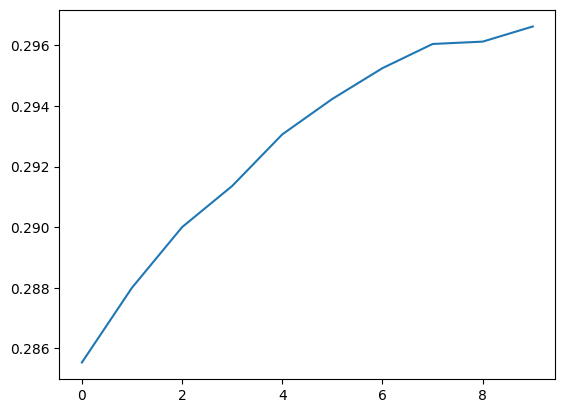

 ----------- Model with layers: 1; positional = True ----------- 
EPOCH 0 loss:2.193717253359058 acc:0.2860
EPOCH 1 loss:2.0629782661606995 acc:0.3372
EPOCH 2 loss:1.9782454726062244 acc:0.3488
EPOCH 3 loss:1.9456550622288185 acc:0.3555
EPOCH 4 loss:1.922726753391797 acc:0.3598
EPOCH 5 loss:1.9009543627123289 acc:0.3648
EPOCH 6 loss:1.878951154177702 acc:0.3700
EPOCH 7 loss:1.8578143783762484 acc:0.3738
EPOCH 8 loss:1.8375131782097152 acc:0.3764
EPOCH 9 loss:1.8176326857337468 acc:0.3797


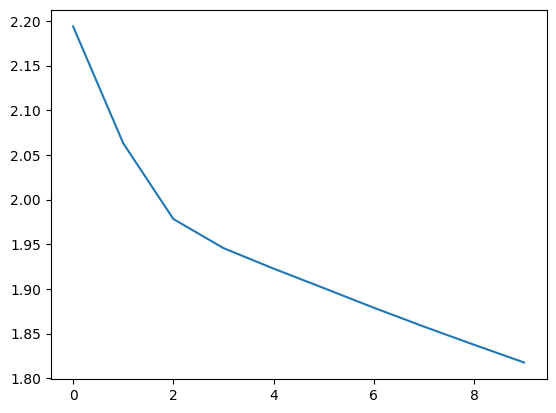

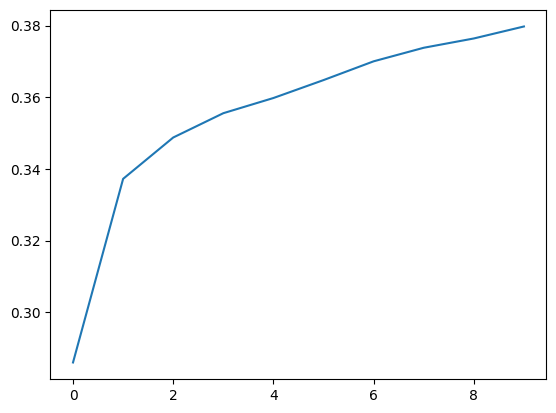

In [83]:
BATCH_SIZE = 128
HIDDEN_DIM = 64
HIDDEN_FF = HIDDEN_DIM * 4
NUM_HEADS = 4
HEAD_DIM = HIDDEN_DIM // NUM_HEADS
NUM_LAYERS = 1
LR = 0.001

print(" ----------- Model with layers: 1; positional = False ----------- ")
model_ex_2 = Decoder(vocab_size=VOCAB_SIZE,
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS,
                positional=False)

model_ex_2.to(DEVICE)
train(model_ex_2, TRAIN_LOADER, TEST_LOADER, 10)

print(" ----------- Model with layers: 1; positional = True ----------- ")
model_ex_2a = Decoder(vocab_size=VOCAB_SIZE,
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS,
                positional=True)

model_ex_2a.to(DEVICE)
train(model_ex_2a, TRAIN_LOADER, TEST_LOADER, 10)

### Experiment 3.
Decoder blocks number: 2

 ----------- Model with layers: 2; positional = False ----------- 
EPOCH 0 loss:2.171648457080503 acc:0.2881
EPOCH 1 loss:2.039202103131934 acc:0.3449
EPOCH 2 loss:1.8177885752689988 acc:0.4193
EPOCH 3 loss:1.5321512297738957 acc:0.5104
EPOCH 4 loss:1.3242793083190918 acc:0.5598
EPOCH 5 loss:1.2032988403416887 acc:0.5836
EPOCH 6 loss:1.1276634916474548 acc:0.5976
EPOCH 7 loss:1.0780496748187873 acc:0.6098
EPOCH 8 loss:1.0437451948093464 acc:0.6170
EPOCH 9 loss:1.017096917840499 acc:0.6230


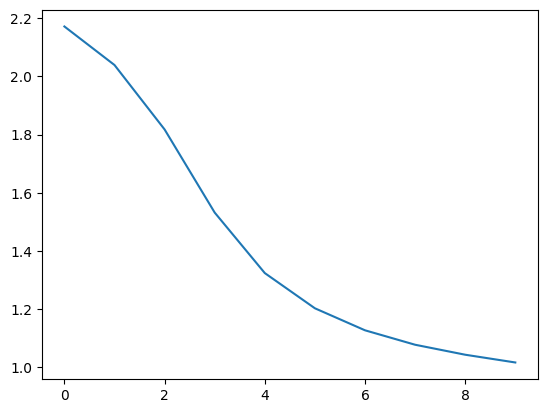

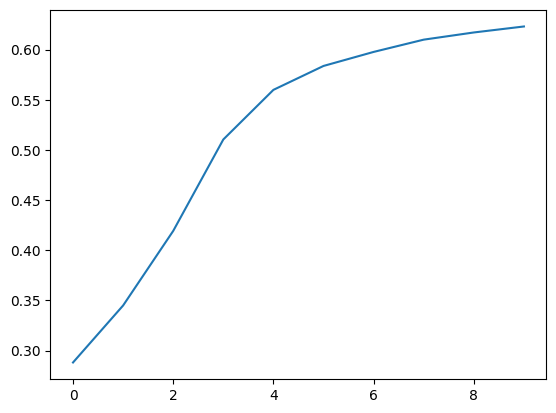

 ----------- Model with layers: 2; positional = True ----------- 
EPOCH 0 loss:2.1734841262237934 acc:0.3019
EPOCH 1 loss:2.00582524341873 acc:0.3480
EPOCH 2 loss:1.705166440975817 acc:0.5880
EPOCH 3 loss:0.9837229214137113 acc:0.7055
EPOCH 4 loss:0.8414016283011134 acc:0.7115
EPOCH 5 loss:0.8126311038113847 acc:0.7137
EPOCH 6 loss:0.7952326528633697 acc:0.7147
EPOCH 7 loss:0.7817825644831115 acc:0.7157
EPOCH 8 loss:0.7695992008040223 acc:0.7161
EPOCH 9 loss:0.7593011395840705 acc:0.7169


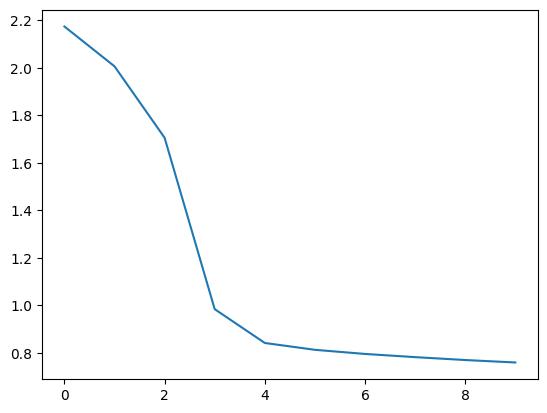

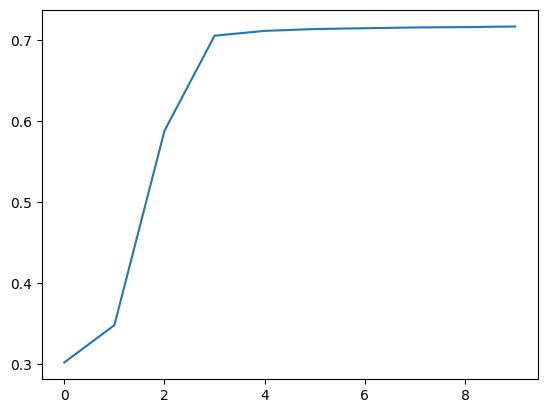

In [84]:
print(" ----------- Model with layers: 2; positional = False ----------- ")
BATCH_SIZE = 128
HIDDEN_DIM = 64
HIDDEN_FF = HIDDEN_DIM * 4
NUM_HEADS = 4
HEAD_DIM = HIDDEN_DIM // NUM_HEADS
NUM_LAYERS = 2
LR = 0.001

model_ex_3 = Decoder(vocab_size=VOCAB_SIZE,
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS,
                positional=False)

model_ex_3.to(DEVICE)
train(model_ex_3, TRAIN_LOADER, TEST_LOADER, 10)

print(" ----------- Model with layers: 2; positional = True ----------- ")
model_ex_3a = Decoder(vocab_size=VOCAB_SIZE,
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS,
                positional=True)

model_ex_3a.to(DEVICE)
train(model_ex_3a, TRAIN_LOADER, TEST_LOADER, 10)


### Experiment 4.
Decoder blocks number: 3


 ----------- Model with layers: 3; positional = False ----------- 
EPOCH 0 loss:2.164296774924556 acc:0.2963
EPOCH 1 loss:1.985629821125465 acc:0.3533
EPOCH 2 loss:1.7091967154152785 acc:0.4697
EPOCH 3 loss:1.3720154928255686 acc:0.5530
EPOCH 4 loss:1.167644358888457 acc:0.5937
EPOCH 5 loss:1.0648767208751244 acc:0.6159
EPOCH 6 loss:1.0049259783346443 acc:0.6323
EPOCH 7 loss:0.96501086331621 acc:0.6406
EPOCH 8 loss:0.9368852422207217 acc:0.6467
EPOCH 9 loss:0.9147093499763103 acc:0.6517


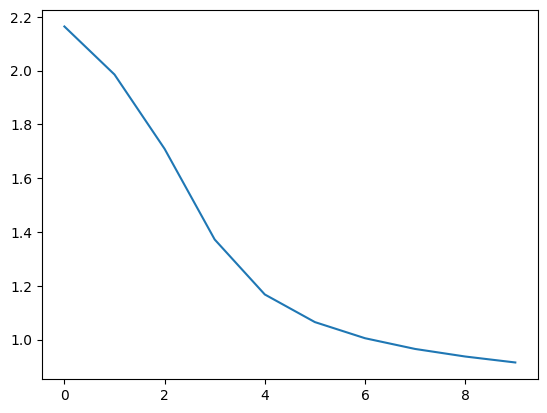

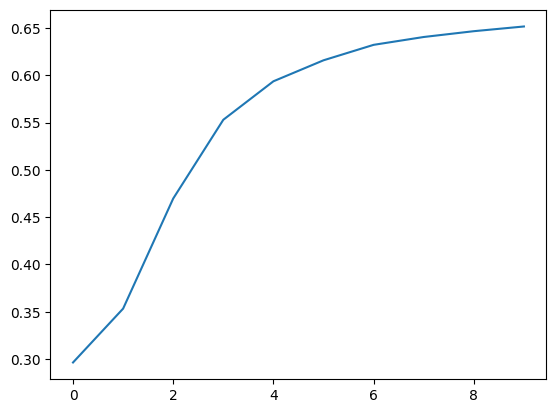

 ----------- Model with layers: 3; positional = True ----------- 
EPOCH 0 loss:2.1669975021217445 acc:0.3061
EPOCH 1 loss:1.9650937771495385 acc:0.3721
EPOCH 2 loss:1.3002282630039166 acc:0.7003
EPOCH 3 loss:0.8380132966403719 acc:0.7139
EPOCH 4 loss:0.8071669672108903 acc:0.7155
EPOCH 5 loss:0.7902753224855736 acc:0.7166
EPOCH 6 loss:0.777029340780234 acc:0.7171
EPOCH 7 loss:0.7663555779034579 acc:0.7176
EPOCH 8 loss:0.7580900260164768 acc:0.7181
EPOCH 9 loss:0.750551311275627 acc:0.7185


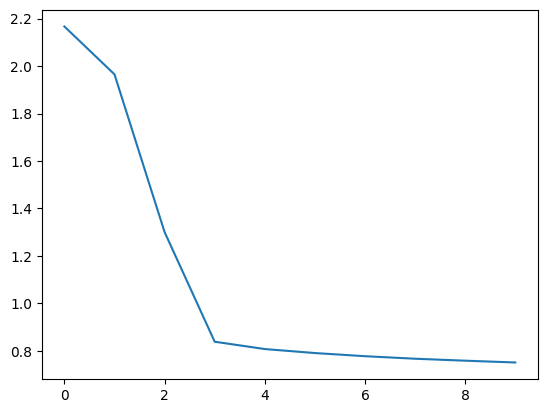

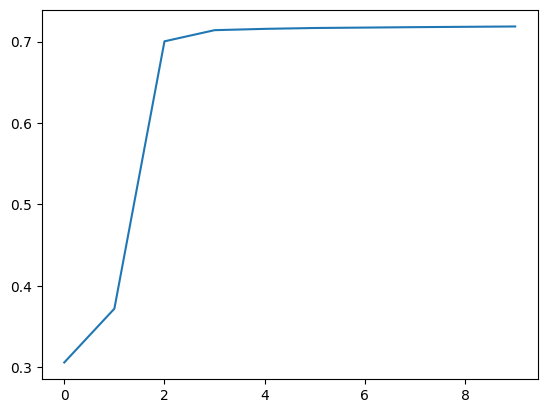

In [85]:
BATCH_SIZE = 128
HIDDEN_DIM = 64
HIDDEN_FF = HIDDEN_DIM * 4
NUM_HEADS = 4
HEAD_DIM = HIDDEN_DIM // NUM_HEADS
NUM_LAYERS = 3
LR = 0.001

print(" ----------- Model with layers: 3; positional = False ----------- ")


model_ex_4 = Decoder(vocab_size=VOCAB_SIZE,
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS,
                positional=False)

model_ex_4.to(DEVICE)
train(model_ex_4, TRAIN_LOADER, TEST_LOADER, 10)

print(" ----------- Model with layers: 3; positional = True ----------- ")
model_ex_4a = Decoder(vocab_size=VOCAB_SIZE,
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS,
                positional=True)

model_ex_4a.to(DEVICE)
train(model_ex_4a, TRAIN_LOADER, TEST_LOADER, 10)

### Experiment 5.
Decoder blocks number: 4


 ----------- Model with layers: 4; positional = False ----------- 
EPOCH 0 loss:2.1612831912463224 acc:0.3088
EPOCH 1 loss:1.9644726544995852 acc:0.3788
EPOCH 2 loss:1.5089354696153086 acc:0.5773
EPOCH 3 loss:1.0978008486047577 acc:0.6383
EPOCH 4 loss:0.9593591146831271 acc:0.6653
EPOCH 5 loss:0.8905395978613745 acc:0.6766
EPOCH 6 loss:0.8491750412349459 acc:0.6871
EPOCH 7 loss:0.8206295997281617 acc:0.6927
EPOCH 8 loss:0.8013024450857428 acc:0.6974
EPOCH 9 loss:0.7881839086737814 acc:0.7004


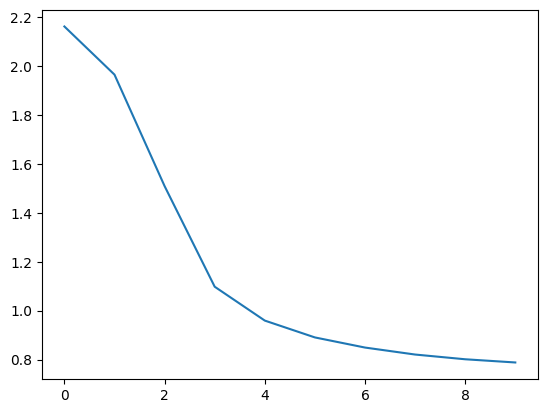

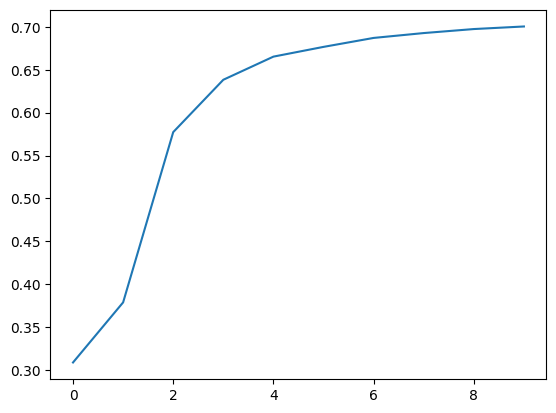

 ----------- Model with layers: 4; positional = True ----------- 
EPOCH 0 loss:2.175856940353973 acc:0.2928
EPOCH 1 loss:1.9932901587667344 acc:0.3656
EPOCH 2 loss:1.3782616355751134 acc:0.6865
EPOCH 3 loss:0.8392654619639432 acc:0.7144
EPOCH 4 loss:0.7847169728218755 acc:0.7181
EPOCH 5 loss:0.7628686246992666 acc:0.7194
EPOCH 6 loss:0.7497322619715824 acc:0.7200
EPOCH 7 loss:0.7404688913610917 acc:0.7210
EPOCH 8 loss:0.7330210872843296 acc:0.7202
EPOCH 9 loss:0.728290981129755 acc:0.7210


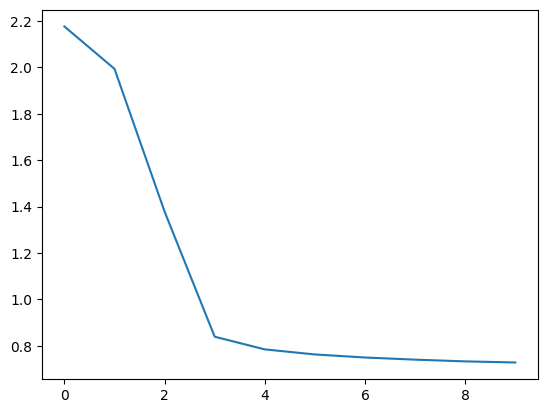

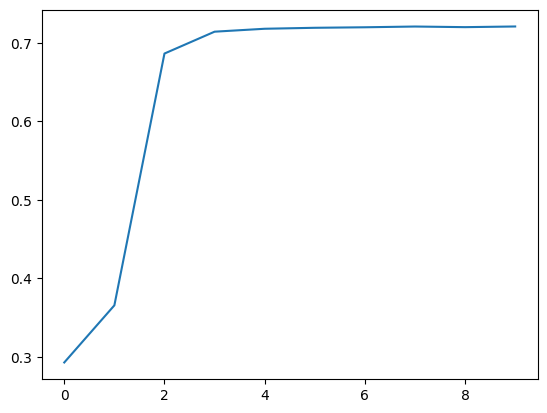

In [86]:
BATCH_SIZE = 128
HIDDEN_DIM = 64
HIDDEN_FF = HIDDEN_DIM * 4
NUM_HEADS = 4
HEAD_DIM = HIDDEN_DIM // NUM_HEADS
NUM_LAYERS = 4
LR = 0.001
print(" ----------- Model with layers: 4; positional = False ----------- ")

model_ex_5 = Decoder(vocab_size=VOCAB_SIZE,
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS,
                positional=False)

model_ex_5.to(DEVICE)
train(model_ex_5, TRAIN_LOADER, TEST_LOADER, 10)
print(" ----------- Model with layers: 4; positional = True ----------- ")
model_ex_5a = Decoder(vocab_size=VOCAB_SIZE,
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS,
                positional=True)

model_ex_5a.to(DEVICE)
train(model_ex_5a, TRAIN_LOADER, TEST_LOADER, 10)

### Experiment 6.
Decoder blocks number: 5


 ----------- Model with layers: 5; positional = False ----------- 
EPOCH 0 loss:2.165238956861858 acc:0.2958
EPOCH 1 loss:1.9600805859022503 acc:0.3876
EPOCH 2 loss:1.4966084957122803 acc:0.5836
EPOCH 3 loss:1.079310642767556 acc:0.6430
EPOCH 4 loss:0.9423736605463149 acc:0.6648
EPOCH 5 loss:0.8785104208354708 acc:0.6782
EPOCH 6 loss:0.8374365794507763 acc:0.6855
EPOCH 7 loss:0.8100853486906124 acc:0.6913
EPOCH 8 loss:0.7907338625268091 acc:0.6968
EPOCH 9 loss:0.7759271203717099 acc:0.6992


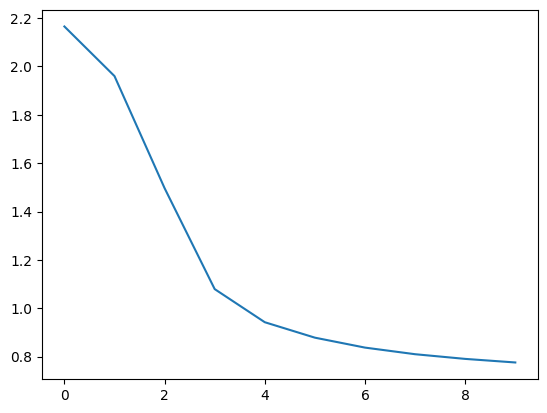

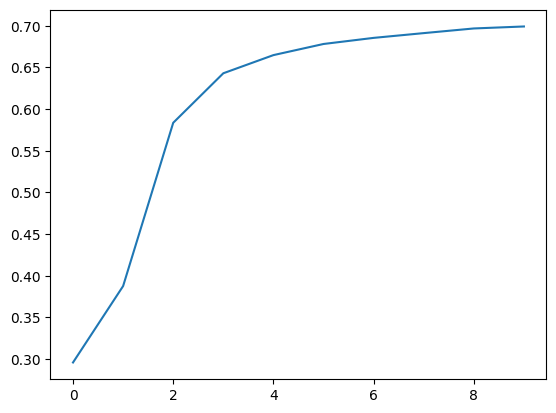

 ----------- Model with layers: 5; positional = True ----------- 
EPOCH 0 loss:2.164495489265345 acc:0.3251
EPOCH 1 loss:1.9350363468822045 acc:0.3931
EPOCH 2 loss:1.3185818489593795 acc:0.6785
EPOCH 3 loss:0.8487799846673314 acc:0.7103
EPOCH 4 loss:0.7816916440106645 acc:0.7185
EPOCH 5 loss:0.756903674783586 acc:0.7201
EPOCH 6 loss:0.7420826343041432 acc:0.7210
EPOCH 7 loss:0.7316806233381923 acc:0.7215
EPOCH 8 loss:0.7235251650025573 acc:0.7224
EPOCH 9 loss:0.7173882617226129 acc:0.7233


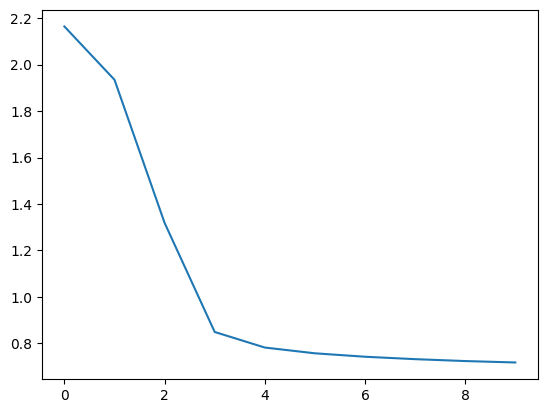

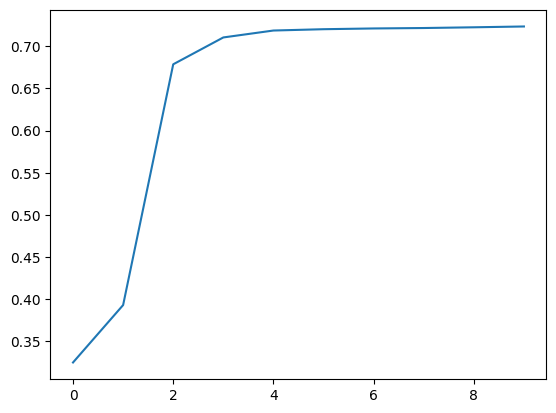

In [87]:
BATCH_SIZE = 128
HIDDEN_DIM = 64
HIDDEN_FF = HIDDEN_DIM * 4
NUM_HEADS = 4
HEAD_DIM = HIDDEN_DIM // NUM_HEADS
NUM_LAYERS = 5
LR = 0.001
print(" ----------- Model with layers: 5; positional = False ----------- ")
model_ex_6 = Decoder(vocab_size=VOCAB_SIZE,
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS,
                positional=False)

model_ex_6.to(DEVICE)
train(model_ex_6, TRAIN_LOADER, TEST_LOADER, 10)
print(" ----------- Model with layers: 5; positional = True ----------- ")
model_ex_6a = Decoder(vocab_size=VOCAB_SIZE,
                d_model=HIDDEN_DIM,
                d_ff=HIDDEN_FF,
                num_heads=NUM_HEADS,
                d_head=HEAD_DIM,
                num_layers=NUM_LAYERS,
                positional=True)

model_ex_6a.to(DEVICE)
train(model_ex_6a, TRAIN_LOADER, TEST_LOADER, 10)

## Text Generation

Use cache to perform efficient text generation. You should generate text token by token. You should consider two choice procedures:
* output the most probable token
* sample from the distribution returned by the model

In [ ]:
# TODO

## Attention visualizations (optional)